# Cricketer Analysis

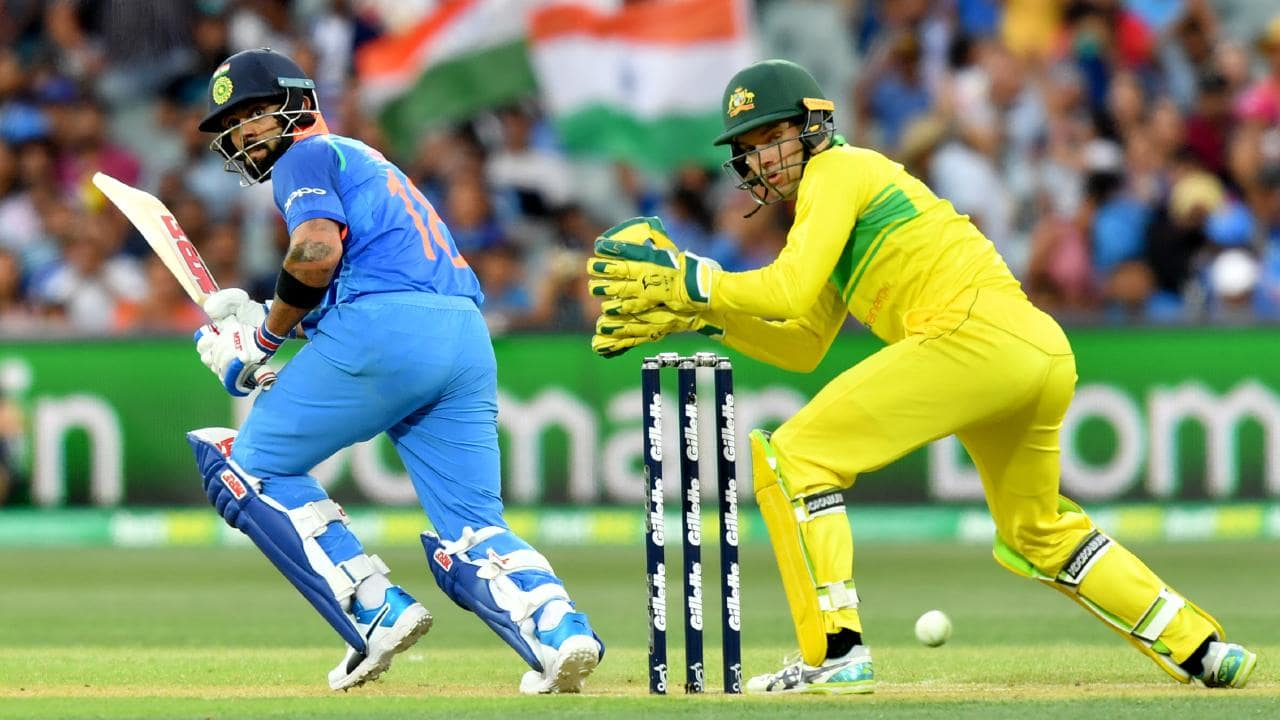

In [ ]:
import pandas as pd 
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/kaggle/input/international-cricket-players-data/personal_male.csv')
df.head()

In [ ]:
# update date of birth to date
df.dob = pd.to_datetime(df.dob)

# Data Understanding

In [ ]:
# check for missing value 
for col in df:
    if df[col].isnull().any():
       print(f'Column {col} has {df[col].isnull().sum()} missing values')

Mostly, players play for the country where they are born however, there are exceptions too. But we assume that the player born in a country will represent same country on national level. Considering this assumption will replace all missing `nationaTeam` with `country`

In [ ]:
# impute missing value in nationaTeam
df.loc[df['nationalTeam'].isnull(),'nationalTeam'] = df['country']

Next, let's impute missing value in bowling style. For this we could check the batting style for each player and again mostly if a batsman is left handed the bowling arm will be left and if he is right hand batsman the bowling arm is right. Again, there are exceptions. Thus based on this assumption we could replace the batting hand side to bowling arm side. Next, we coudl also check what is the most common bowling style for right and left hander. 

In [ ]:
# check what is the batting style for the players where bowling style is missing 
df[df.bowlingStyle.isnull()].battingStyle.value_counts()

In [ ]:
# check most common bowling style
df.bowlingStyle.value_counts()

For Right hand will be replacing with `Right-arm medium` and for left hand batsman will replace bowling style with `Slow left-arm`

In [ ]:
# right hand bat with right hand most common bowling style
df.loc[df.bowlingStyle.isnull() & (df.battingStyle=='Right-hand bat'), ['bowlingStyle']]  = 'Right-arm medium'
# left hand bat with lest arm most common bowling style
df.loc[df.bowlingStyle.isnull() & (df.battingStyle=='Left-hand bat'), ['bowlingStyle']]  = 'Slow left-arm'

Also, there were 6 players with missing batting style, lets impute with the most common style in batting and bowling.

In [ ]:
df.loc[df.bowlingStyle.isnull()]

In [ ]:
df.loc[df.bowlingStyle.isnull(), ['bowlingStyle'] ] = 'Right-arm medium'
df.loc[df.battingStyle.isnull(), ['battingStyle'] ] = 'Right-hand bat'

In [ ]:
# generate age from date of birth 
df['age'] = (pd.to_datetime('now') - df['dob']).astype('<m8[Y]') 

In [ ]:
# let us see what we got from date
df.age.describe()

# Data Visualization

In [ ]:
plt.figure(figsize=(12,16))
ax = sns.countplot(y="nationalTeam", data=df,
              color = 'orange', order = df['nationalTeam'].value_counts().index)

total=len(df['nationalTeam'])
for p in ax.patches:
    percentage ='{:,.0f}'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
plt.ylabel('National Teams')
plt.title('Total Numbers of Players per National Team', fontsize = 20);

In [ ]:
df.age.plot(kind = 'hist')
plt.axvline(df.age.mean(), color='red', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df.age.mean()*1.1, max_ylim*0.9, 'Mean: {:.0f} years'.format(df.age.mean()));

The maximum age is 192 and 25 percentage players have age more than 91 years. The DOB accuracy is questionable. 

In [ ]:
bat = df.groupby(['nationalTeam', 'battingStyle']).count()['name'].reset_index().rename(columns={'nationalTeam':'nationalTeam','battingStyle' : 'battingStyle', 'name':'count'})

In [ ]:
# create top teams list 
top_countries = ['England', 'Australia', 'South Africa', 'India', 'West Indies', 'New Zealand', 'Pakistan', 'Sri Lanka', 'Bangladesh', 'Zimbabwe']

In [ ]:
sns.catplot(x = 'nationalTeam', y = 'count', data = bat[bat.nationalTeam.isin(top_countries)], height=5, aspect=3, kind = 'bar', hue = 'battingStyle');

In [ ]:
bowl = df.groupby(['nationalTeam', 'bowlingStyle']).count()['name'].reset_index().rename(columns={'nationalTeam':'nationalTeam','bowlingStyle' : 'bowlingStyle', 'name':'count'}).sort_values(by=['count'], ascending=False)
# keep top 5 bowling styles
bowl = bowl.groupby('nationalTeam').head(5).reset_index(drop=True)

In [ ]:
for i in top_countries:
    sns.catplot(x = 'count', y = 'bowlingStyle', data = bowl[bowl.nationalTeam.isin([i])], height=3, aspect=4, kind = 'bar', hue = 'nationalTeam');

In [ ]:
fig = plt.figure(figsize=(15,8))
g = sns.scatterplot('nationalTeam', 'bowlingStyle', data=bowl, size = 'count',sizes=(50, 300) )
plt.xticks(rotation=90);

Based on above, we can see for all the national teams the common bowling styles are `Right-arm medium`, `Right-arm fast-medium`, `Off-break`and[](http://) `Slow left-arm`. Let us see which country produces more number of pacers. 

In [ ]:
df[df.bowlingStyle.str.contains('fast')].country.value_counts()[:5].plot(kind = 'bar')
plt.ylabel('Number of Players')
plt.xlabel('Country')
plt.title('Countries Producing Fast Bowlers');